<a href="https://colab.research.google.com/github/mikemykhaylov/mat422Coursework/blob/main/4_3_Spectral_graph_bipartitioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install numpy seaborn scipy matplotlib ipympl pillow scikit-learn requests sympy torch torchinfo networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.3 MB/s eta 0:00:00


In [2]:
from google.colab import output

output.enable_custom_widget_manager()

In [3]:
%matplotlib widget

# 4.3 Spectral graph bipartitioning

- Ratio cut: $\frac{cut(A,B)}{|A|} + \frac{cut(A,B)}{|B|}$
- Normalized cut: $\frac{cut(A,B)}{vol(A)} + \frac{cut(A,B)}{vol(B)}$

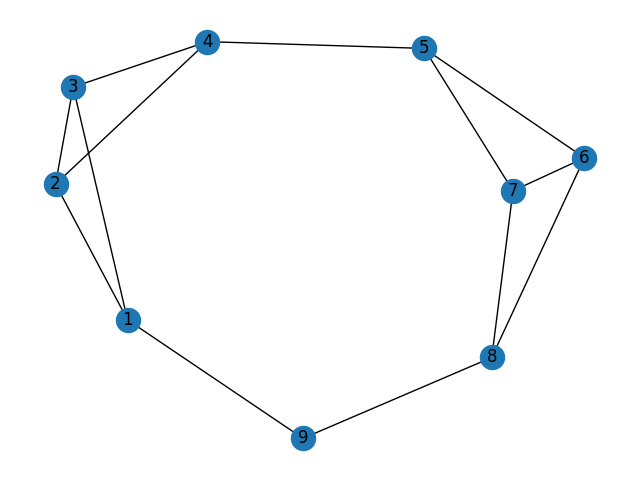

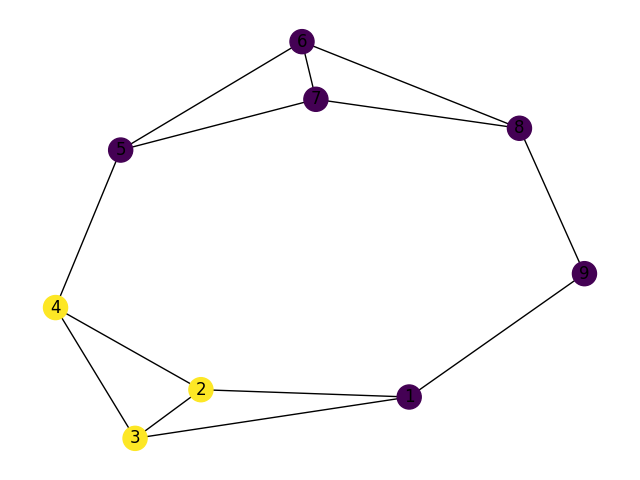

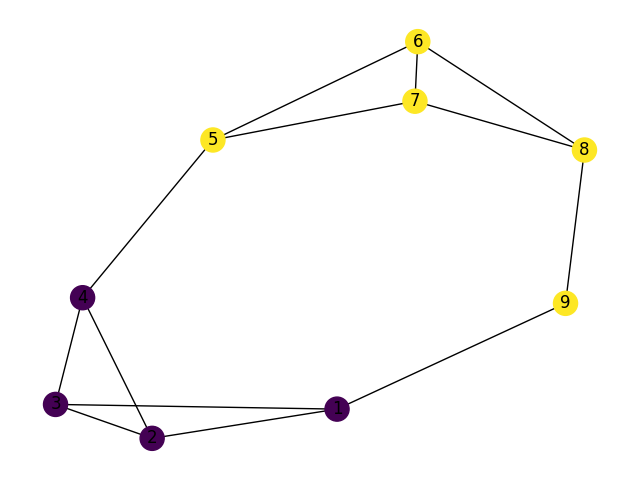

Cut for Partition 1: 3
Cut for Partition 2: 2
Ratio Cut for Partition 1: 0.3333333333333333
Normalized Cut for Partition 1: 0.11538461538461539
Ratio Cut for Partition 2: 0.2222222222222222
Normalized Cut for Partition 2: 0.07692307692307693


In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def visualize_partition(graph, partition, title):
    fig = plt.figure()
    pos = nx.spring_layout(graph)
    colors = [partition[node] for node in graph.nodes]
    nx.draw(graph, pos, node_color=colors, with_labels=True)
    plt.title(title)
    plt.show()

def calculate_cut(graph, partition):
    cut_value = 0
    for edge in graph.edges:
        if partition[edge[0]] != partition[edge[1]]:
            cut_value += 1
    return cut_value

# Create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5), (5, 6), (5, 7), (6, 7), (6, 8), (7, 8), (8, 9), (9, 1)])

# Visualize the graph
fig = plt.figure()
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.title("Graph")
plt.show()

# Define the partition based on the example
partition_1 = {1: 1, 2: 2, 3: 2, 4: 2, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1}
partition_2 = {1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2}

# Visualize the partitions
visualize_partition(G, partition_1, "Partition 1")
visualize_partition(G, partition_2, "Partition 2")

# Calculate and print cut values
cut_1 = calculate_cut(G, partition_1)
cut_2 = calculate_cut(G, partition_2)
print("Cut for Partition 1:", cut_1)
print("Cut for Partition 2:", cut_2)

# Calculate and print ratio cut and normalized cut
ratio_cut_1 = cut_1 / len(partition_1)
normalized_cut_1 = cut_1 / sum([G.degree(node) for node in G.nodes])
ratio_cut_2 = cut_2 / len(partition_2)
normalized_cut_2 = cut_2 / sum([G.degree(node) for node in G.nodes])

print("Ratio Cut for Partition 1:", ratio_cut_1)
print("Normalized Cut for Partition 1:", normalized_cut_1)
print("Ratio Cut for Partition 2:", ratio_cut_2)
print("Normalized Cut for Partition 2:", normalized_cut_2)